In [90]:
import numpy as np
from google.colab import drive
import os
import matplotlib.pyplot as plt

In [91]:
def mount_drive():
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/Machine Learning Algo Implementations/Linear Regression/1 Variable Gradient Descent')

In [92]:
def step_descent(X,Y,learning_rate,m,c):
  
  M=len(X)

  m_slope=0 # the slope of the graph between the cost and m
  c_slope=0 # slope of the graph between cost and c
 
  for i in range(M):
    x=X[i]
    y=Y[i]

    m_slope=m_slope+(-2/M)*(y-m*x-c)*x
    c_slope=c_slope+(-2/M)*(y-m*x-c)

  new_m=m-learning_rate*m_slope
  new_c=c-learning_rate*c_slope

  return new_m,new_c

In [93]:
def cost(X,Y,m,c):
  
  M=len(X)
  cost=0
  for i in range(M):
    x=X[i]
    y=Y[i]
    cost=cost+(1/M)*(y-m*x-c)**2
  return cost

In [110]:
def visualize_graph(cost_values,m_values,c_values):
  plt.subplot(2,2,1)
  plt.xlabel('m')
  plt.ylabel('cost')
  plt.title('Cost Vs M')
  plt.plot(m_values,cost_values)

  plt.subplot(2,2,3)
  plt.xlabel('C')
  plt.ylabel('cost')
  plt.title('Cost Vs C')
  plt.plot(c_values,cost_values)
  plt.show()

In [111]:
def gradient_descent(X,Y,num_iterations,learning_rate):
  
  m=0
  c=0

  cost_values=[]
  m_values=[]
  c_values=[]

  for i in range(num_iterations):
    m,c=step_descent(X,Y,learning_rate,m,c)
    cost_value=cost(X,Y,m,c)
    cost_values.append(cost_value)
    m_values.append(m)
    c_values.append(c)
    #print('iteration number:',i,'cost:',cost_value)

  return m,c,m_values,c_values,cost_values

In [112]:
def run():
  #mount_drive()
  data=np.loadtxt('data.csv',delimiter=',')
  X=data[:,0]
  Y=data[:,1]
  num_iterations=1000
  learning_rate=0.0001

  m,c,m_values,c_values,cost_values=gradient_descent(X,Y,num_iterations,learning_rate)
  visualize_graph(cost_values,m_values,c_values)

  print('optimal m:',m,'optimal c:',c)

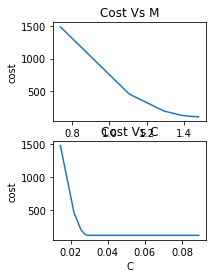

optimal m: 1.477744085189445 optimal c: 0.0889365199374136


In [113]:
run()